# Experiment on models and result

This is primary notebook for defining model,showing training history and result 

# Table of contents

- [1 - Packages](#1)
    - [additional keras import](#1_1)
- [2 - Load and Preprocess data](#2)
    - [Load data](#2_1)
    - [Preprocess data](#2_2)
    - [Data augmentation](#2_3)
- [3 - Define model](#3)
    - [logistic Regression(Softmax)](#3_1)
    - [Convolutional NN (VGG architecture)](#3_2)
- [4 - Experiment with Model](#4)
    - [Train and valid](#4_1)
    - [Test](#4_2)
- [5 - Conclusion](#5)

<a name='1'></a>
# 1 - Packages


- numpy is the fundamental package for scientific computing with Python.
- matplotlib is a library for plotting graphs in Python.
- tensorflow is a common library for defining model 
- pandas is used for read csv file and process data
- cv is for reading and showing image
- util is a module written by us for additional function 

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow import keras
import sys
sys.path.insert(0,"./utils")
import util
import numpy as np
from tensorflow import keras
import pandas as pd
import cv2

<a name='1_1'></a>
### Additional keras import

In [2]:
from keras.datasets.cifar import load_batch
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import backend


<a name='2'></a>
# 2 - Load and Preprocess data


<a name="2_1"></a>
### Load data

In [3]:
input_shape = (32, 32, 3)

x_train, y_train = load_batch("./data/train", label_key="fine_labels")
x_test, y_test = load_batch("./data/test", label_key="fine_labels")
meta_data = util.unpickle("./data/meta")
list_label=  meta_data['fine_label_names'] 
# train-valid-test split
x_train , x_val = x_train[0:45000,:,:,:],x_train[45000:50000,:,:,:]
y_train , y_val = y_train[0:45000],y_train[45000:50000]

y_train = np.reshape(y_train, (len(y_train), 1))
y_test = np.reshape(y_test, (len(y_test), 1))
y_val = np.reshape(y_val, (len(y_val), 1))
if backend.image_data_format() == "channels_last":
  x_train = x_train.transpose(0, 2, 3, 1)
  x_test = x_test.transpose(0, 2, 3, 1)
  x_val = x_val.transpose(0, 2, 3, 1)

print(f"cifar100 loaded")
print(type(x_train[:1]))
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")
print(f"x_val shape: {x_val.shape} - y_val shape: {y_val.shape}")
print("Label Names:", list_label )


cifar100 loaded
<class 'numpy.ndarray'>
x_train shape: (45000, 32, 32, 3) - y_train shape: (45000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)
x_val shape: (5000, 32, 32, 3) - y_val shape: (5000, 1)
Label Names: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', '

<a name="2_2"></a>
### Preprocess data
- Change type of data to float
- Convert pixels to (0,1) scale
- Perform one-hot encoding 
    

In [8]:
#conver data type to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#convert to (0,1) scale
x_train, x_test,x_val = x_train / 255, x_test / 255, x_val/255
#perform one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


Example of one-hot encoding :

In [5]:
df_ytrain = pd.DataFrame(y_train)
df_ytrain

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a name="2_3"></a>
### Data Augmentation

Perform augmentation to get more data from orginal dataset and allow model fit on batches with real-time data augmentation


In [6]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(x_train, y_train, batch_size=64)
steps = int(x_train.shape[0] / 64)

<a name='3'></a>
# 3 - Define model

We define model using keras and set parameters by intuition based one these two book :
- Introduction to Neural Networks for Java (second edition) by Jeff Heaton 
- Practical Neural Network Recipes in C++

All the models in this section has been tuned so we dont describe tuning phase of model


<a name="3_1"></a>
## Logistic regression (softmax)
Based on the intuition from those book above,there are two thing we need to decide: number of hidden layers,number of nodes in the hidden layer
- Determining the Number of Hidden Layers :
    we believe this would be the intuition when deciding number of hidden layer :
    
     0 - Only capable of representing linear separable functions or decisions.

     1 - Can approximate any function that contains a continuous mapping from one finite space to another.

     2 - Can represent an arbitrary decision boundary to arbitrary accuracy with rational activation functions and can approximate any smooth mapping to any accuracy.
- Determining the Number of node in Hidden Layers :
    Deciding the number of neurons in the hidden layers is a very important part of deciding your overall neural network architecture. Though these layers do not directly interact with the external environment, they have a tremendous influence on the final output. Both the number of hidden layers and the number of neurons in each of these hidden layers must be carefully considered.
    
    Using too few neurons in the hidden layers will result in something called underfitting. Underfitting occurs when there are too few neurons in the hidden layers to adequately detect the signals in a complicated data set.
    
    Using too many neurons in the hidden layers can result in several problems. First, too many neurons in the hidden layers may result in overfitting. Overfitting occurs when the neural network has so much information processing capacity that the limited amount of information contained in the training set is not enough to train all of the neurons in the hidden layers. A second problem can occur even when the training data is sufficient. An inordinately large number of neurons in the hidden layers can increase the time it takes to train the network. The amount of training time can increase to the point that it is impossible to adequately train the neural network. Obviously, some compromise must be reached between too many and too few neurons in the hidden layers.
    There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

    - The number of hidden neurons should be between the size of the input layer and the size of the output layer.
    - The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
    - The number of hidden neurons should be less than twice the size of the input laye




### Zero layer NN

In [7]:
def build_zero_layer_model():
    model = Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
                           #  kernel_regularizer=keras.regularizers.l2(l=0.1),
                            # bias_regularizer=keras.regularizers.l2(l=0.1)))
    model.add(Dropout(0.3))
    model.add(layers.Dense(100, activation="softmax"))
    return model


### One layer NN

In [4]:
def build_one_layer_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(keras.layers.Dense(256,activation="relu",
                                 kernel_regularizer=keras.regularizers.l2(l=0.01),
#                                  bias_regularizer=keras.regularizers.l2(l=0.01)
                                )
    )
#     model.add(Dropout(0))
#     model.add(BatchNormalization())
    model.add(layers.Dense(100, activation="softmax"))
    model.compile(
      optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"],
    )
    return model
one_layer_NN_logis = keras.models.load_model('./Logistic-Regression-Model/logistic-regression-1layer-CPU/model/one-layer-model')
one_layer_NN_logis.summary()

Model: "one_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 100)               25700     
                                                                 
Total params: 812,388
Trainable params: 812,388
Non-trainable params: 0
_________________________________________________________________


### Two layer NN

In [5]:

def build_two_layer_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(keras.layers.Dense(1410,activation="relu",
                                 kernel_regularizer=keras.regularizers.l2(l=0.01))
    )
#     model.add(Dropout(0.4))
#     model.add(BatchNormalization())
    model.add(keras.layers.Dense(705,activation="relu",
                                 kernel_regularizer=keras.regularizers.l2(l=0.01),
                                 kernel_initializer='he_uniform')
    )
#     model.add(Dropout(0.2))
#     model.add(BatchNormalization())    
    model.add(layers.Dense(100, activation="softmax"))
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"],
    )
    return model
two_layer_NN_logis = keras.models.load_model('./Logistic-Regression-Model/logistic-regression-2layer-CPU/model/two-layer-model')
two_layer_NN_logis.summary()

Model: "two_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1410)              4332930   
                                                                 
 dense_4 (Dense)             (None, 705)               994755    
                                                                 
 dense_5 (Dense)             (None, 100)               70600     
                                                                 
Total params: 5,398,285
Trainable params: 5,398,285
Non-trainable params: 0
_________________________________________________________________


<a name="3_2"></a>
## Convolutional Neural Network (VGG architecture)

VGG stands for Visual Geometry Group; it is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers.In this project we apply VGG architecture to the model,VGG means using 3x3 kernel size with stride equal to 1 and same padding,filter for max-pooling layer is 2x2 with stride equal to 2.After 2 convolution and pooling layer,we double the filter 


<img src="./images/VGG.png" />

In [10]:
def build_VGG_CNN():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_uniform',
                                padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(l=0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='softmax')) 
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model


load trained model

In [6]:
VGG_CNN = keras.models.load_model('./Convolutional-NN-Model/cnn_with_dropout_batchnorm_750ep/model/cnn-model-3')
VGG_CNN.summary()

Model: "VGG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                               

<a name='4'></a>
# 4 - Experiment with Model


<a name="4_1"></a>
## Train and Valid

### Logistic Regression training history

After experiment,we believe CPU perform better computation than GPU for statistical Model,as result show belown:

| Model                 | Accuracy                 | Epoch |
| ----------            |:-------------:           |       |
|one-layer-with-GPU     |0.08553333580493927       |1500   |
|one-layer-with-CPU     |0.1229555532336235        |700    |
|two-layer-with-GPU     |0.17704445123672485       |1500   |
|two-layer-with-CPU     |0.19286666810512543       |702    |

As previous,we only plot training experiment with cpu :




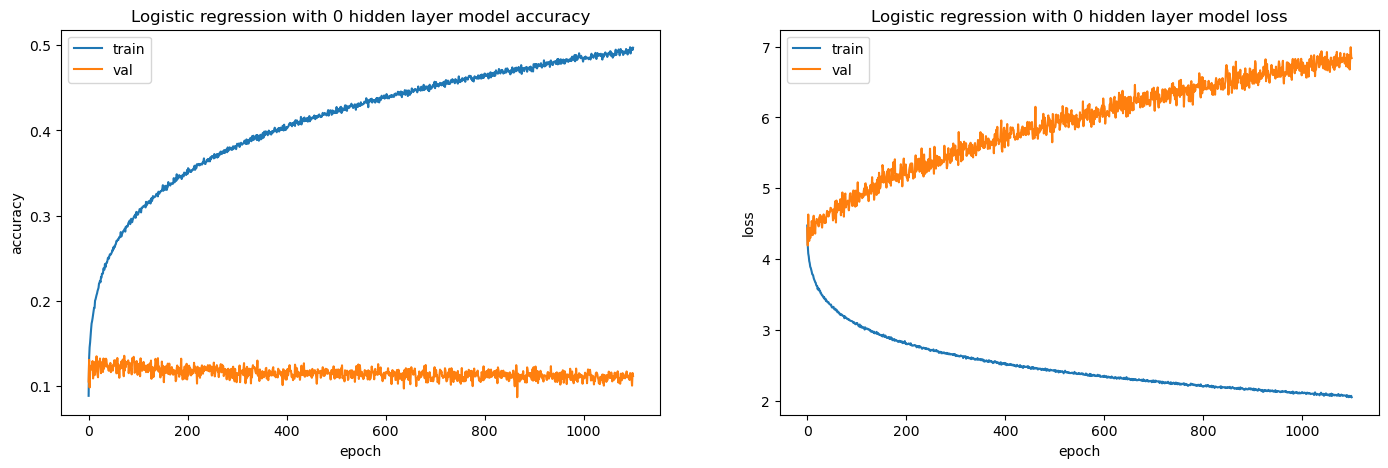

In [12]:
zerolayer_his = pd.read_csv('./history-report/zerolayer.csv')

# summarize history for accuracy and loss
f, axarr = plt.subplots(1,2,figsize=(17,5),dpi=100)
axarr[0].plot(zerolayer_his['accuracy'])
axarr[0].plot(zerolayer_his['val_accuracy'])
axarr[0].title.set_text('Logistic regression with 0 hidden layer model accuracy')
axarr[0].set_ylabel('accuracy')
axarr[0].set_xlabel('epoch')
axarr[0].legend(['train', 'val'], loc='upper left')
axarr[1].plot(zerolayer_his['loss'])
axarr[1].plot(zerolayer_his['val_loss'])
axarr[1].title.set_text('Logistic regression with 0 hidden layer model loss')
axarr[1].set_ylabel('loss')
axarr[1].set_xlabel('epoch')
axarr[1].legend(['train', 'val'], loc='upper left')


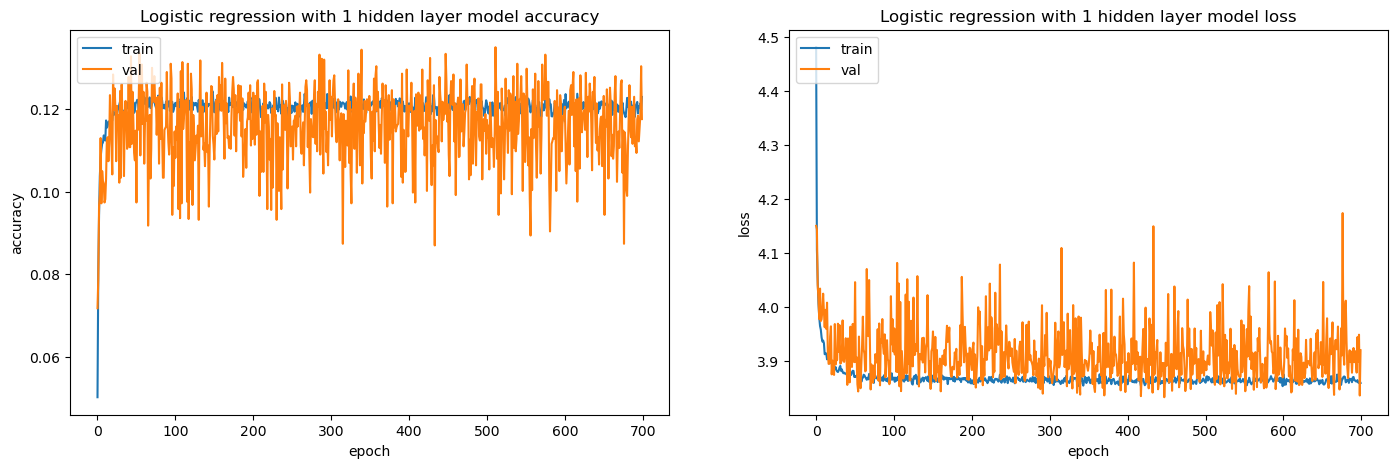

In [13]:
onelayer_his = pd.read_csv('./history-report/onelayer-cpu.csv')
# summarize history for accuracy and loss

f, axarr = plt.subplots(1,2,figsize=(17,5),dpi=100)
axarr[0].plot(onelayer_his['accuracy'])
axarr[0].plot(onelayer_his['val_accuracy'])
axarr[0].title.set_text('Logistic regression with 1 hidden layer model accuracy')
axarr[0].set_ylabel('accuracy')
axarr[0].set_xlabel('epoch')
axarr[0].legend(['train', 'val'], loc='upper left')
axarr[1].plot(onelayer_his['loss'])
axarr[1].plot(onelayer_his['val_loss'])
axarr[1].title.set_text('Logistic regression with 1 hidden layer model loss')
axarr[1].set_ylabel('loss')
axarr[1].set_xlabel('epoch')
axarr[1].legend(['train', 'val'], loc='upper left')


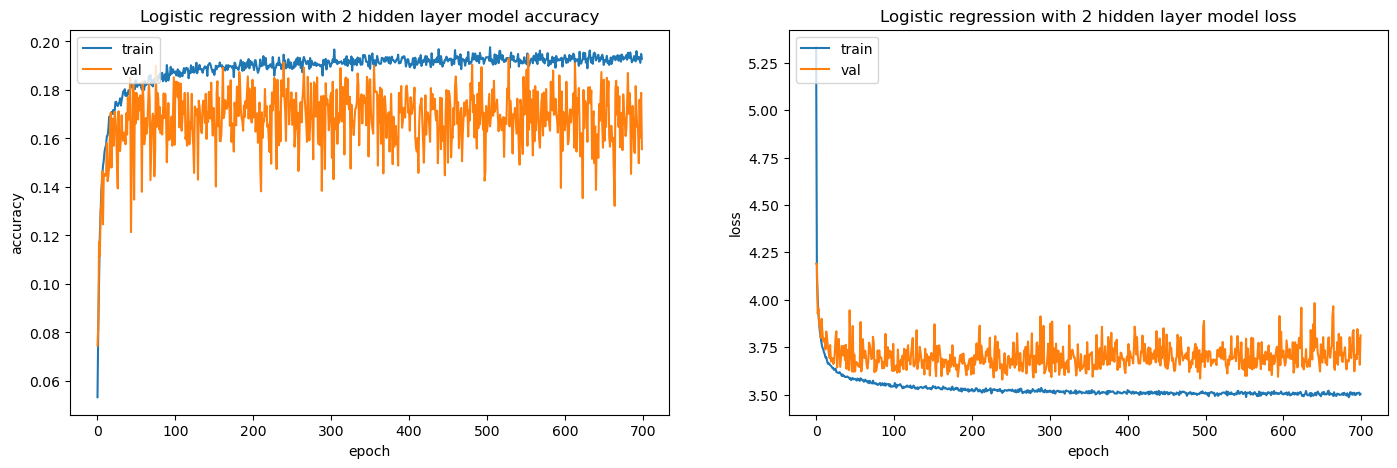

In [14]:
twolayer_his = pd.read_csv('./history-report/twolayer-cpu.csv')
# summarize history for accuracy and loss
f, axarr = plt.subplots(1,2,figsize=(17,5),dpi=100)
axarr[0].plot(twolayer_his['accuracy'])
axarr[0].plot(twolayer_his['val_accuracy'])
axarr[0].title.set_text('Logistic regression with 2 hidden layer model accuracy')
axarr[0].set_ylabel('accuracy')
axarr[0].set_xlabel('epoch')
axarr[0].legend(['train', 'val'], loc='upper left')
axarr[1].plot(twolayer_his['loss'])
axarr[1].plot(twolayer_his['val_loss'])
axarr[1].title.set_text('Logistic regression with 2 hidden layer model loss')
axarr[1].set_ylabel('loss')
axarr[1].set_xlabel('epoch')
axarr[1].legend(['train', 'val'], loc='upper left')


### VGG training history

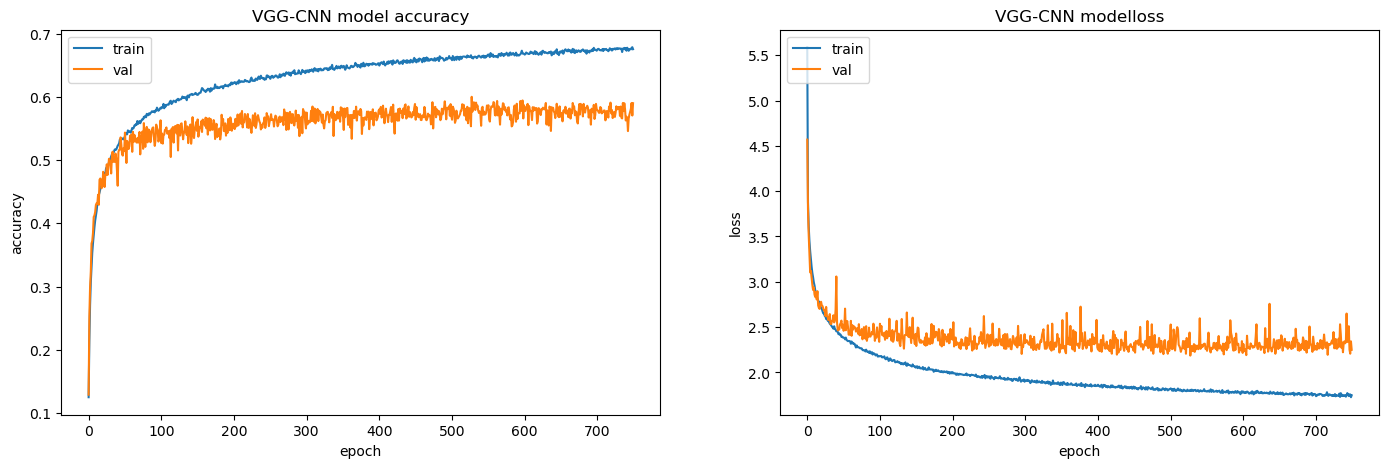

In [15]:
vgg_his = pd.read_csv('./history-report/CNN-history-v2.csv')

f, axarr = plt.subplots(1,2,figsize=(17,5),dpi=100)
axarr[0].plot(vgg_his['accuracy'])
axarr[0].plot(vgg_his['val_accuracy'])
axarr[0].title.set_text('VGG-CNN model accuracy')
axarr[0].set_ylabel('accuracy')
axarr[0].set_xlabel('epoch')
axarr[0].legend(['train', 'val'], loc='upper left')
axarr[1].plot(vgg_his['loss'])
axarr[1].plot(vgg_his['val_loss'])
axarr[1].title.set_text('VGG-CNN modelloss')
axarr[1].set_ylabel('loss')
axarr[1].set_xlabel('epoch')
axarr[1].legend(['train', 'val'], loc='upper left')

<a name="4_2"></a>
## Test

### Evaluate models on test set 

- logistic regression with 1 hidden layer 

In [9]:
one_layer_NN_logis.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 3.9059 - accuracy: 0.1210 - 2s/epoch - 5ms/step


[3.905856132507324, 0.12099999934434891]

- logistic regression with 2 hidden layer 

In [10]:
two_layer_NN_logis.evaluate(x_test, y_test, verbose=2)

313/313 - 5s - loss: 3.8091 - accuracy: 0.1626 - 5s/epoch - 16ms/step


[3.809051275253296, 0.16259999573230743]

- VGG-architecture model

In [11]:
VGG_CNN.evaluate(x_test, y_test, verbose=2)


313/313 - 14s - loss: 2.2240 - accuracy: 0.5959 - 14s/epoch - 43ms/step


[2.2240281105041504, 0.5958999991416931]

### Testing with image from internet

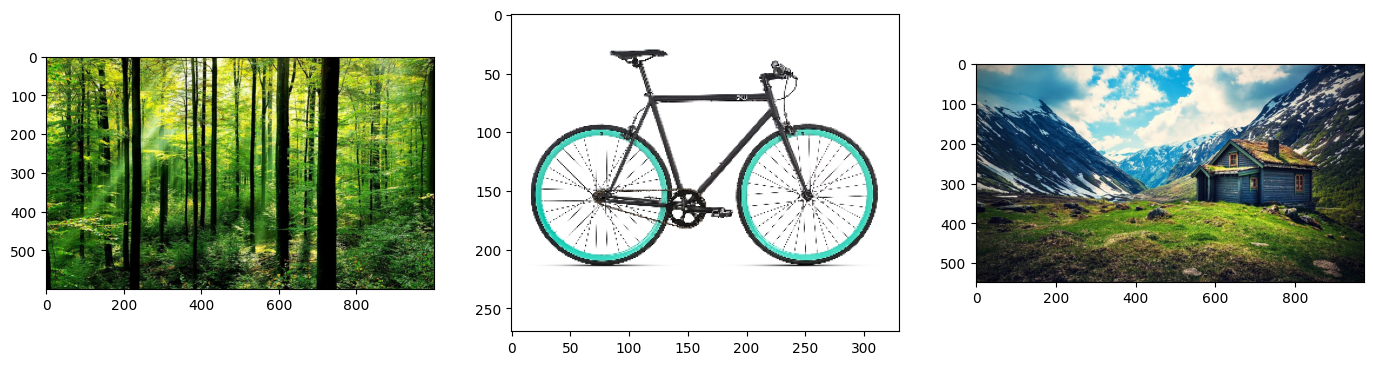

In [12]:
forest_img = cv2.imread("./data/forest.jpg")
bicycle_img= cv2.imread("./data/bicycle.jpg")
mountain_img =cv2.imread("./data/high-res-mountain_house.jpg")
mountain_img = cv2.cvtColor(mountain_img,cv2.COLOR_BGR2RGB)
bicycle_img = cv2.cvtColor(bicycle_img,cv2.COLOR_BGR2RGB)
forest_img = cv2.cvtColor(forest_img,cv2.COLOR_BGR2RGB)
f, axarr = plt.subplots(1,3,figsize=(17,5),dpi=100)
axarr[0].imshow(forest_img)
axarr[0].tick_params(axis='both', which='major', labelsize=10)
axarr[1].imshow(bicycle_img)
axarr[1].tick_params(axis='both', which='major', labelsize=10)
axarr[2].imshow(mountain_img)
axarr[2].tick_params(axis='both', which='major', labelsize=10)

### Using cv2 library for image compression

(1, 32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)


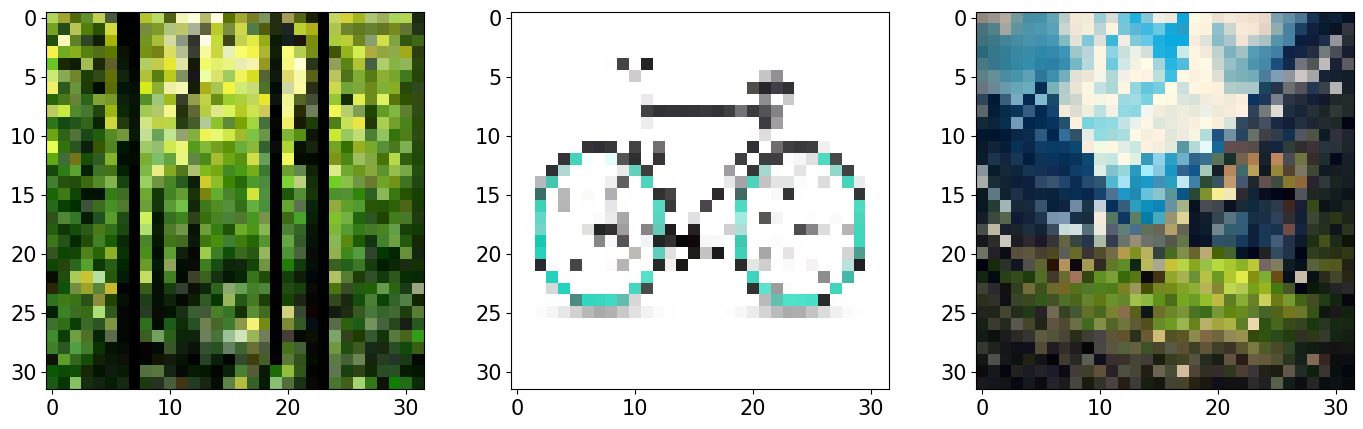

In [13]:

processed_forest_img=cv2.resize(forest_img,(32,32))
processed_bicycle_img=cv2.resize(bicycle_img,(32,32))
processed_mountain_img=cv2.resize(mountain_img,(32,32))



f, axarr = plt.subplots(1,3,figsize=(17,5),dpi=100)

axarr[0].imshow(processed_forest_img)
axarr[0].tick_params(axis='both', which='major', labelsize=15)
axarr[1].imshow(processed_bicycle_img)
axarr[1].tick_params(axis='both', which='major', labelsize=15)
axarr[2].imshow(processed_mountain_img)
axarr[2].tick_params(axis='both', which='major', labelsize=15)
processed_forest_img = util.load_image(processed_forest_img)
print(processed_forest_img.shape)

processed_bicycle_img = util.load_image(processed_bicycle_img)
print(processed_bicycle_img.shape)

processed_mountain_img = util.load_image(processed_mountain_img)
print(processed_mountain_img.shape)

### Predict with various models

- Logistic regression with zero hiddin layer 

- Logistic regression with one hidden layer

1/1 [==============================] - 0s 25ms/step
prediction for first image : skunk
prediction for second image : chair
prediction for third image : mountain


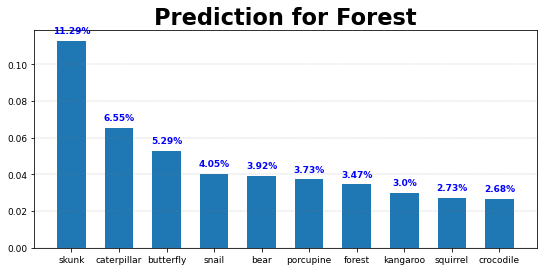

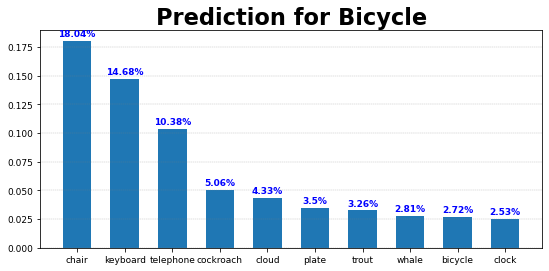

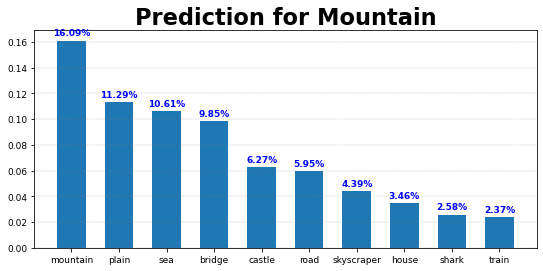

In [14]:
result1 = one_layer_NN_logis.predict(processed_forest_img)
result2 = one_layer_NN_logis.predict(processed_bicycle_img)
result3 = one_layer_NN_logis.predict(processed_mountain_img)
res1 = result1[0].tolist()
res2 = result2[0].tolist()
res3 = result3[0].tolist()
print("prediction for first image :",list_label[res1.index(max(result1[0].tolist()))])
print("prediction for second image :",list_label[res2.index(max(result2[0].tolist()))])
print("prediction for third image :",list_label[res3.index(max(result3[0].tolist()))])
util.gen_graph(result1[0],limit=10,mul=.08,msg="Forest")
util.gen_graph(result2[0],limit=10,mul=.08,msg="Bicycle")
util.gen_graph(result3[0],limit=10,mul=.08,msg="Mountain")

- Logistic regression with two hidden layer

1/1 [==============================] - 0s 24ms/step
prediction for first image : forest
prediction for second image : chair
prediction for third image : forest


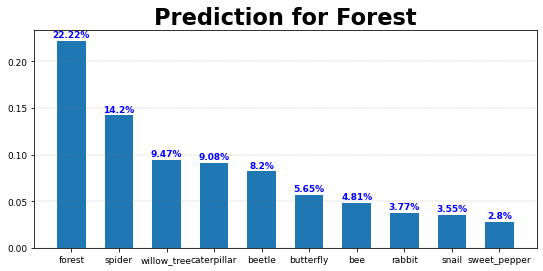

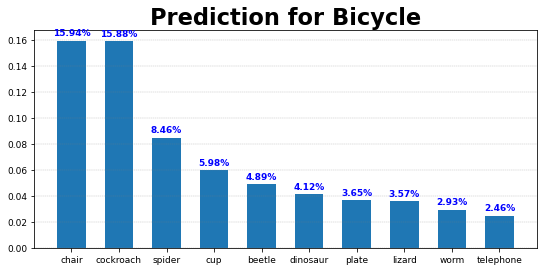

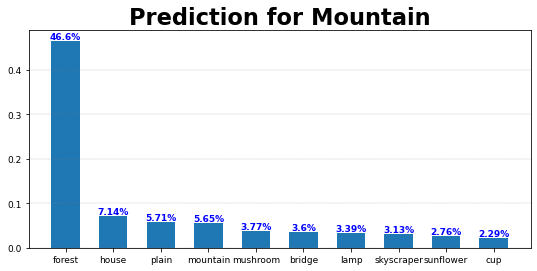

In [15]:
result1 = two_layer_NN_logis.predict(processed_forest_img)
result2 = two_layer_NN_logis.predict(processed_bicycle_img)
result3 = two_layer_NN_logis.predict(processed_mountain_img)
res1 = result1[0].tolist()
res2 = result2[0].tolist()
res3 = result3[0].tolist()
print("prediction for first image :",list_label[res1.index(max(result1[0].tolist()))])
print("prediction for second image :",list_label[res2.index(max(result2[0].tolist()))])
print("prediction for third image :",list_label[res3.index(max(result3[0].tolist()))])
util.gen_graph(result1[0],limit=10,mul=.08,msg="Forest")
util.gen_graph(result2[0],limit=10,mul=.08,msg="Bicycle")
util.gen_graph(result3[0],limit=10,mul=.08,msg="Mountain")

- VGG convolutional neural network

1/1 [==============================] - 0s 24ms/step
prediction for first image : caterpillar
prediction for second image : bicycle
prediction for third image : mountain


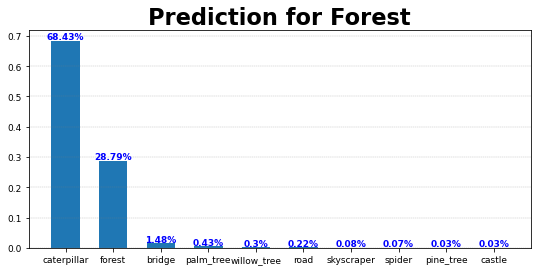

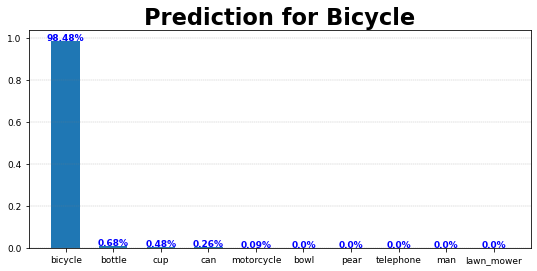

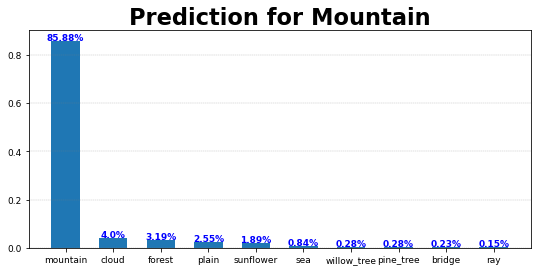

In [16]:
result1 = VGG_CNN.predict(processed_forest_img)
result2 = VGG_CNN.predict(processed_bicycle_img)
result3 = VGG_CNN.predict(processed_mountain_img)
res1 = result1[0].tolist()
res2 = result2[0].tolist()
res3 = result3[0].tolist()
print("prediction for first image :",list_label[res1.index(max(result1[0].tolist()))])
print("prediction for second image :",list_label[res2.index(max(result2[0].tolist()))])
print("prediction for third image :",list_label[res3.index(max(result3[0].tolist()))])
util.gen_graph(result1[0],limit=10,mul=.08,msg="Forest")
util.gen_graph(result2[0],limit=10,mul=.08,msg="Bicycle")
util.gen_graph(result3[0],limit=10,mul=.08,msg="Mountain")

### Using online tool for image compression

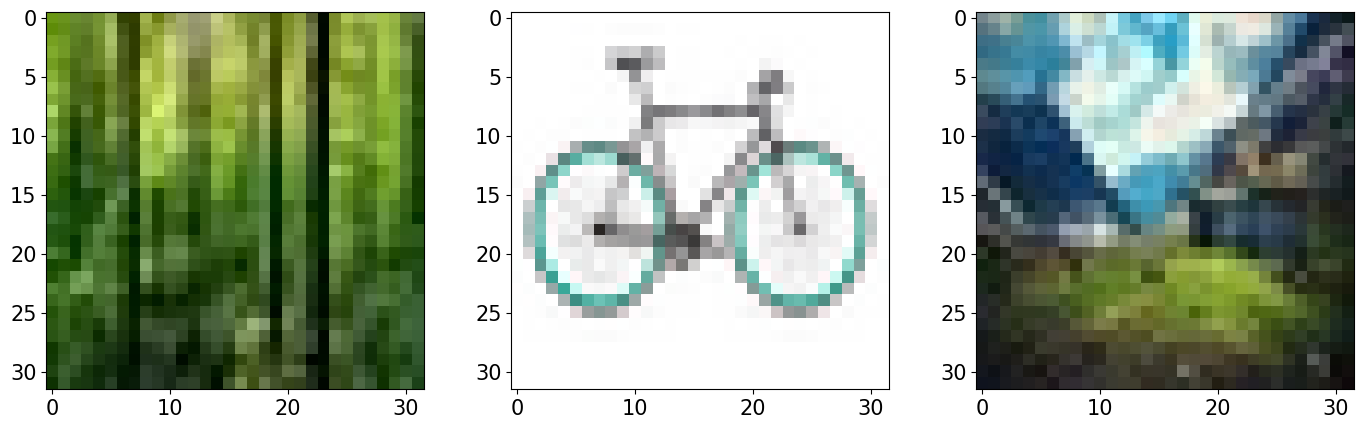

In [17]:
compress_forest_img = cv2.imread("./data/compress-forest.jpg")
compress_bicycle_img = cv2.imread("./data/compress-bicycle.jpg")
compress_mountain_img = cv2.imread("./data/compress-mountain-house.jpg")

compress_forest_img = cv2.cvtColor(compress_forest_img,cv2.COLOR_BGR2RGB)
compress_mountain_img = cv2.cvtColor(compress_mountain_img,cv2.COLOR_BGR2RGB)
compress_bicycle_img = cv2.cvtColor(compress_bicycle_img,cv2.COLOR_BGR2RGB)
f, axarr = plt.subplots(1,3,figsize=(17,5),dpi=100)

axarr[0].imshow(compress_forest_img)
axarr[0].tick_params(axis='both', which='major', labelsize=15)
axarr[1].imshow(compress_bicycle_img)
axarr[1].tick_params(axis='both', which='major', labelsize=15)
axarr[2].imshow(compress_mountain_img)
axarr[2].tick_params(axis='both', which='major', labelsize=15)


compress_forest_img = util.load_image(compress_forest_img)
compress_mountain_img = util.load_image(compress_mountain_img)
compress_bicycle_img = util.load_image(compress_bicycle_img)


1/1 [==============================] - 0s 22ms/step
prediction for first image : skunk
prediction for second image : chair
prediction for third image : mountain


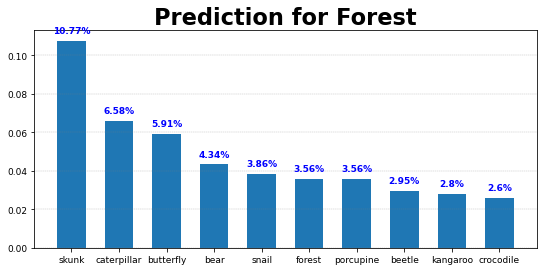

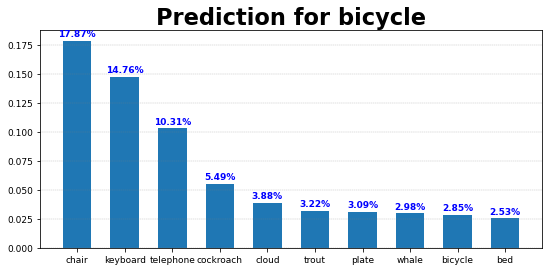

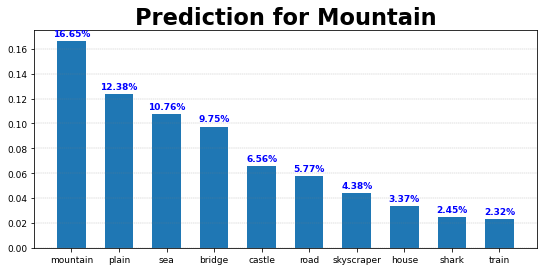

In [18]:
result5 = one_layer_NN_logis.predict(compress_forest_img)
result6 = one_layer_NN_logis.predict(compress_bicycle_img)
result7 = one_layer_NN_logis.predict(compress_mountain_img)
res5 = result5[0].tolist()
res6 = result6[0].tolist()
res7 = result7[0].tolist()
print("prediction for first image :",list_label[res5.index(max(res5))])
print("prediction for second image :",list_label[res6.index(max(res6))])
print("prediction for third image :",list_label[res7.index(max(res7))])
util.gen_graph(result5[0],limit=10,mul=.08,msg="Forest")
util.gen_graph(result6[0],limit=10,mul=.08,msg="bicycle")
util.gen_graph(result7[0],limit=10,mul=.08,msg="Mountain")

1/1 [==============================] - 0s 24ms/step
prediction for first image : forest
prediction for second image : cockroach
prediction for third image : forest


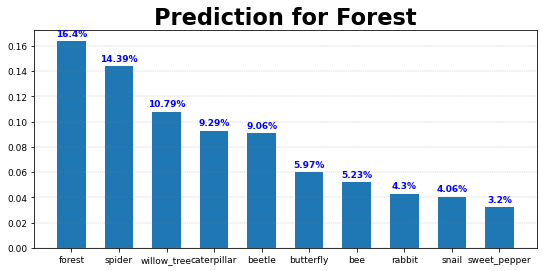

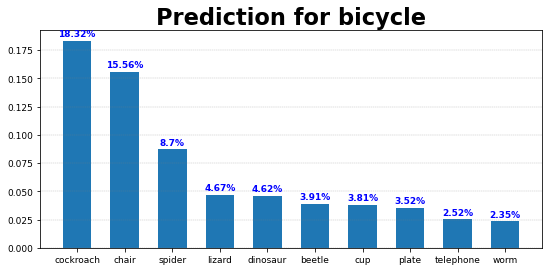

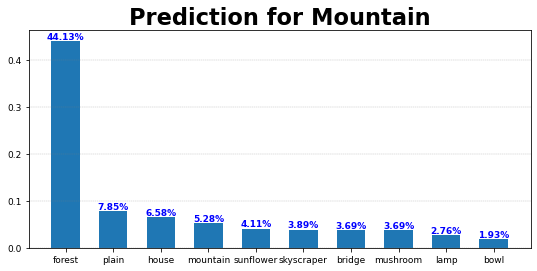

In [19]:
result5 = two_layer_NN_logis.predict(compress_forest_img)
result6 = two_layer_NN_logis.predict(compress_bicycle_img)
result7 = two_layer_NN_logis.predict(compress_mountain_img)
res5 = result5[0].tolist()
res6 = result6[0].tolist()
res7 = result7[0].tolist()
print("prediction for first image :",list_label[res5.index(max(res5))])
print("prediction for second image :",list_label[res6.index(max(res6))])
print("prediction for third image :",list_label[res7.index(max(res7))])
util.gen_graph(result5[0],limit=10,mul=.08,msg="Forest")
util.gen_graph(result6[0],limit=10,mul=.08,msg="bicycle")
util.gen_graph(result7[0],limit=10,mul=.08,msg="Mountain")


1/1 [==============================] - 0s 24ms/step
prediction for first image : forest
prediction for second image : bicycle
prediction for third image : mountain


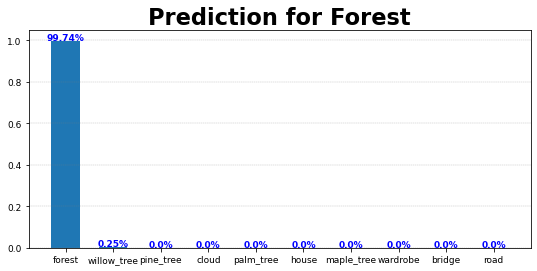

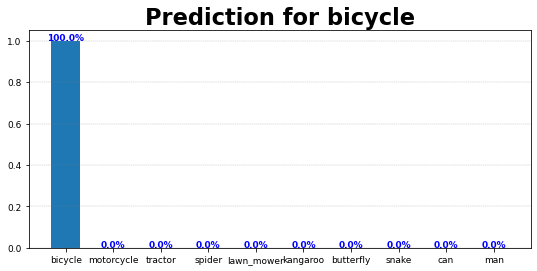

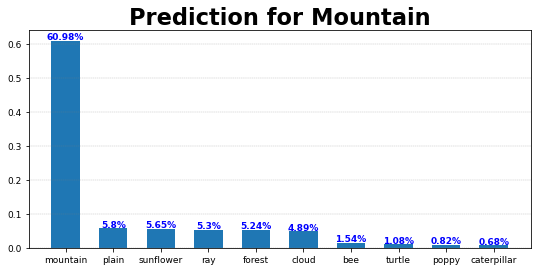

In [20]:
result5 = VGG_CNN.predict(compress_forest_img)
result6 = VGG_CNN.predict(compress_bicycle_img)
result7 = VGG_CNN.predict(compress_mountain_img)
res5 = result5[0].tolist()
res6 = result6[0].tolist()
res7 = result7[0].tolist()
print("prediction for first image :",list_label[res5.index(max(res5))])
print("prediction for second image :",list_label[res6.index(max(res6))])
print("prediction for third image :",list_label[res7.index(max(res7))])
util.gen_graph(result5[0],limit=10,mul=.08,msg="Forest")
util.gen_graph(result6[0],limit=10,mul=.08,msg="bicycle")
util.gen_graph(result7[0],limit=10,mul=.08,msg="Mountain")



<a name='5'></a>
# 5 - Conclusion


What Logistic Regression can do is diffent than cnn.From our perspective, Logistic Regression mainly do mapping of value of pixel in the image and if object which image is trying to predict have less diverse color,model may do fine.You can take example of the case when Logistic Regression predict the forest image,it still has high probability for forest-related class which obviously is going to be mainly green.With CNN,if the more regconizable the edges when image is scaled down,the better the prediction.Because of that,we brought different cases with different compression method to show that if the more data prpperties we keep after compression,the better the prediction.Beside that to improve the model,we can add more data to each class,600 images for each class is actually low,especially with deep learning. 

